# Exercitiu #3
Este asemanator exercitiului #2, dar de data asta vom incerc sa prezicem miscarea unui obiect pe un plan (2D).

In [2]:
import math
import csv

In [3]:
def f1(x):
    return (x * math.sin(x)) / math.exp(x/10)

def f2(x):
    return (2*x - math.sin(x)) * (math.cos(x/3))

In [4]:
xval = [i * 0.05 for i in range(20, int(100 / 0.05) + 1)] 
results = [(x, f1(x), f2(x)) for x in xval]

In [5]:
with open("data2.csv", mode="w", newline="") as file:
    writer = csv.writer(file)
    writer.writerows(results)

print("Data generated.")

Data generated.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2024-07-09 11:55:12.815336: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
columns = ["t", "x", "y"]

rawDataset = pd.read_csv("./data2.csv", names=columns, sep=",")
dataset = rawDataset.copy()
dataset.head()

,t,x,y
0,1.00,0.761394,1.094760
1,1.05,0.820011,1.157849
2,1.10,0.878211,1.221794
3,1.15,0.935648,1.286555
4,1.20,0.991973,1.352082


In [8]:
dataset.describe().transpose()

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


,count,mean,std,min,25%,50%,75%,max
t,1981.0,50.500000,28.600488,1.000000,25.750000,50.50000,75.250000,100.000000
x,1981.0,-0.000692,1.123293,-3.661546,-0.140643,-0.00031,0.164900,3.581578
y,1981.0,5.415001,80.657291,-169.879976,-48.003630,1.44232,58.735639,188.519239


In [9]:
for column in columns:
    dataset[column] = pd.to_numeric(dataset[column])
    dataset[column] = (dataset[column] - dataset[column].min()) / (dataset[column].max() - dataset[column].min())

dataset.tail()

,t,x,y
1976,0.997980,0.505094,0.319604
1977,0.998485,0.505120,0.310625
1978,0.998990,0.505147,0.301687
1979,0.999495,0.505175,0.292792
1980,1.000000,0.505203,0.283945


In [10]:
trainSet = dataset.sample(frac=0.8)
testSet = dataset.drop(trainSet.index)

In [11]:
trainFeatures = trainSet["t"]
testFeatures = testSet["t"]
trainLabels = trainSet.copy()
trainLabels.pop("t")
testLabels = testSet.copy()
testLabels.pop("t")

4       0.002020
8       0.004040
12      0.006061
29      0.014646
32      0.016162
          ...   
1943    0.981313
1959    0.989394
1977    0.998485
1978    0.998990
1980    1.000000
Name: t, Length: 396, dtype: float64

In [12]:
trainFeatures.head()

1181    0.596465
809     0.408586
1604    0.810101
1416    0.715152
590     0.297980
Name: t, dtype: float64

In [13]:
trainLabels.head()

,x,y
1181,0.498322,0.606014
809,0.453633,0.547371
1604,0.503976,0.312587
1416,0.508849,0.618957
590,0.347352,0.346894


In [14]:
model = tf.keras.Sequential([
    layers.Flatten(input_shape=(1,)),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(256, activation="relu"),
    layers.Dense(2)
])

2024-07-09 11:55:19.683100: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(0.001),
    loss="mean_absolute_error",
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 512)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 2)                 514       
                                                                 
Total params: 395,778
Trainable params: 395,778
Non-trai

In [16]:
history = model.fit(
    trainFeatures, trainLabels,
    validation_split = 0.2,
    epochs = 300
)

Epoch 1/300
40/40 [==============================] - 2s 35ms/step - loss: 0.2008 - val_loss: 0.1366
Epoch 2/300
40/40 [==============================] - 1s 25ms/step - loss: 0.1388 - val_loss: 0.1331
Epoch 3/300
40/40 [==============================] - 1s 32ms/step - loss: 0.1350 - val_loss: 0.1322
Epoch 4/300
40/40 [==============================] - 1s 29ms/step - loss: 0.1331 - val_loss: 0.1331
Epoch 5/300
40/40 [==============================] - 1s 30ms/step - loss: 0.1343 - val_loss: 0.1341
Epoch 6/300
40/40 [==============================] - 1s 28ms/step - loss: 0.1344 - val_loss: 0.1339
Epoch 7/300
40/40 [==============================] - 1s 23ms/step - loss: 0.1346 - val_loss: 0.1371
Epoch 8/300
40/40 [==============================] - 1s 24ms/step - loss: 0.1344 - val_loss: 0.1322
Epoch 9/300
40/40 [==============================] - 1s 36ms/step - loss: 0.1338 - val_loss: 0.1323
Epoch 10/300
40/40 [==============================] - 1s 28ms/step - loss: 0.1333 - val_loss: 0.1326

(0.01, 0.15)

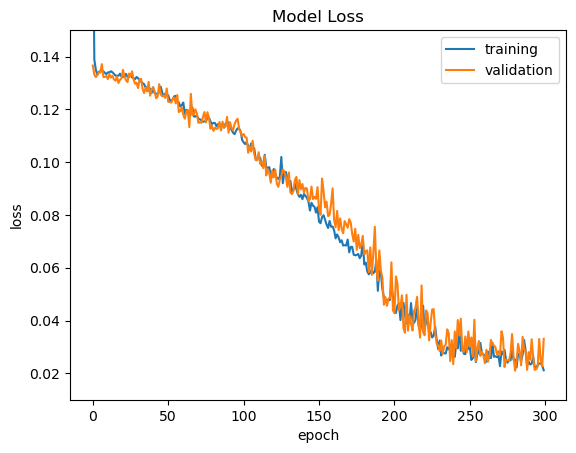

In [17]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["training", "validation"])
plt.ylim(0.01, 0.15)

In [18]:
evaluation = model.evaluate(testFeatures, testLabels, verbose=0)
predictions = model.predict(testFeatures)
print(evaluation)
print(predictions)

13/13 [==============================] - 1s 10ms/step
0.02985399216413498
[[0.5173297  0.48649848]
 [0.51747376 0.48646194]
 [0.5176227  0.4864245 ]
 [0.518258   0.48626512]
 [0.51837003 0.48623705]
 [0.51877075 0.48613167]
 [0.519012   0.48606813]
 [0.51905227 0.48605758]
 [0.5190925  0.48604703]
 [0.5191729  0.4860258 ]
 [0.5193338  0.48598343]
 [0.51941425 0.48596233]
 [0.51945436 0.48595166]
 [0.5196556  0.48589873]
 [0.5198567  0.4858458 ]
 [0.5201381  0.48577166]
 [0.5201783  0.4857611 ]
 [0.52030087 0.4857285 ]
 [0.5204259  0.4856947 ]
 [0.5204675  0.48568344]
 [0.52050924 0.48567218]
 [0.5216852  0.48549336]
 [0.55189264 0.4809456 ]
 [0.5823987  0.4773171 ]
 [0.62183946 0.474271  ]
 [0.66256696 0.47132027]
 [0.75759804 0.46443546]
 [0.7983254  0.46148485]
 [0.839053   0.45853412]
 [0.85262877 0.45755064]
 [0.87941104 0.45586795]
 [0.9458739  0.4520405 ]
 [0.95916647 0.451275  ]
 [0.99981266 0.44339877]
 [0.9413889  0.429191  ]
 [0.9061395  0.42827362]
 [0.8871842  0.42782563]
 

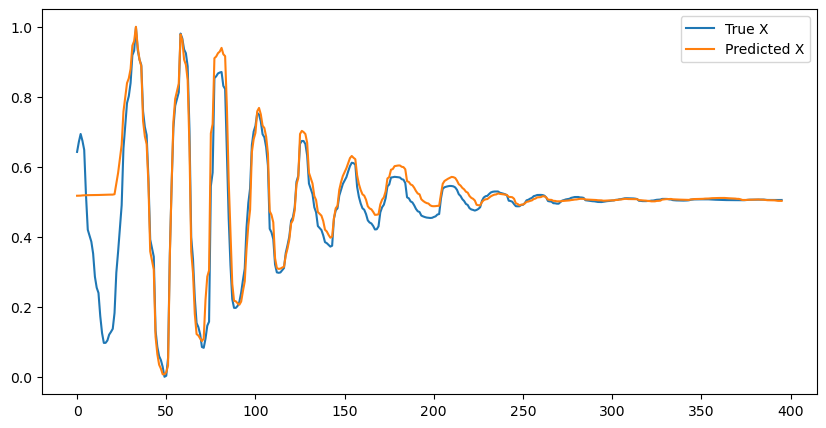

In [19]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 0], label='True X')
plt.plot(predictions[:, 0], label='Predicted X')
plt.legend()
plt.show()

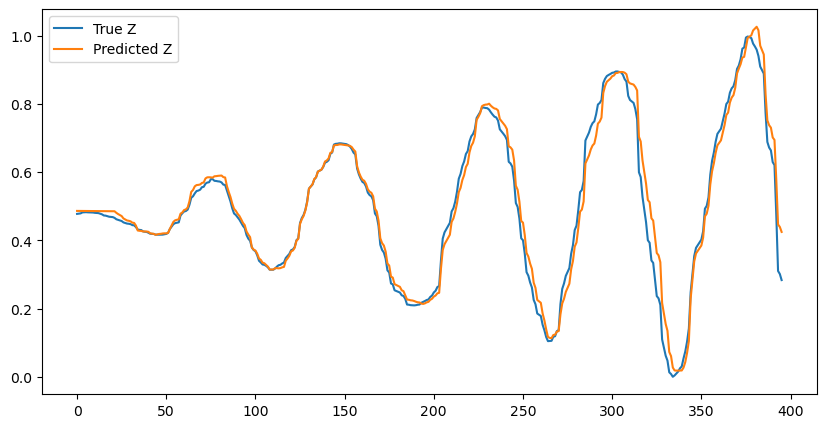

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(testLabels.values[:, 1], label='True Z')
plt.plot(predictions[:, 1], label='Predicted Z')
plt.legend()
plt.show()


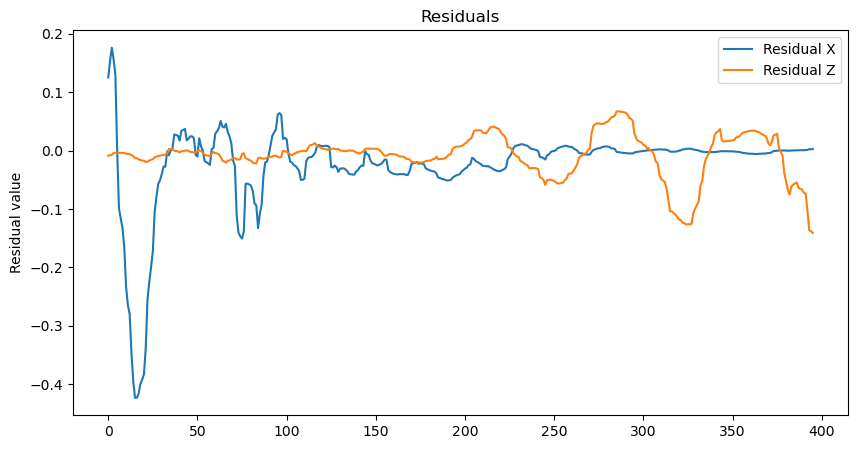

In [21]:
residuals = testLabels.values - predictions

plt.figure(figsize=(10, 5))
plt.plot(residuals[:, 0], label='Residual X')
plt.plot(residuals[:, 1], label='Residual Z')
plt.legend()
plt.title("Residuals")
plt.ylabel("Residual value")
plt.show()

Text(0.5, 1.0, 'True vs. Predicted Z')

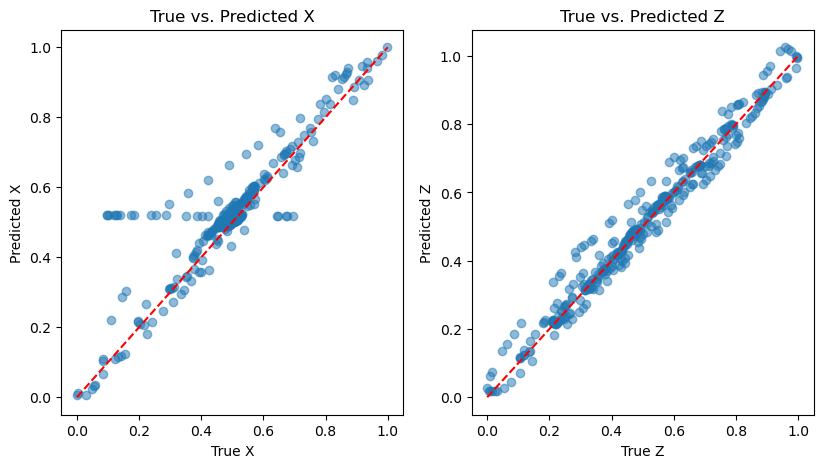

In [22]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(testLabels.values[:, 0], predictions[:, 0], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True X')
plt.ylabel('Predicted X')
plt.title('True vs. Predicted X')

plt.subplot(1, 3, 2)
plt.scatter(testLabels.values[:, 1], predictions[:, 1], alpha=0.5)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('True Z')
plt.ylabel('Predicted Z')
plt.title('True vs. Predicted Z')

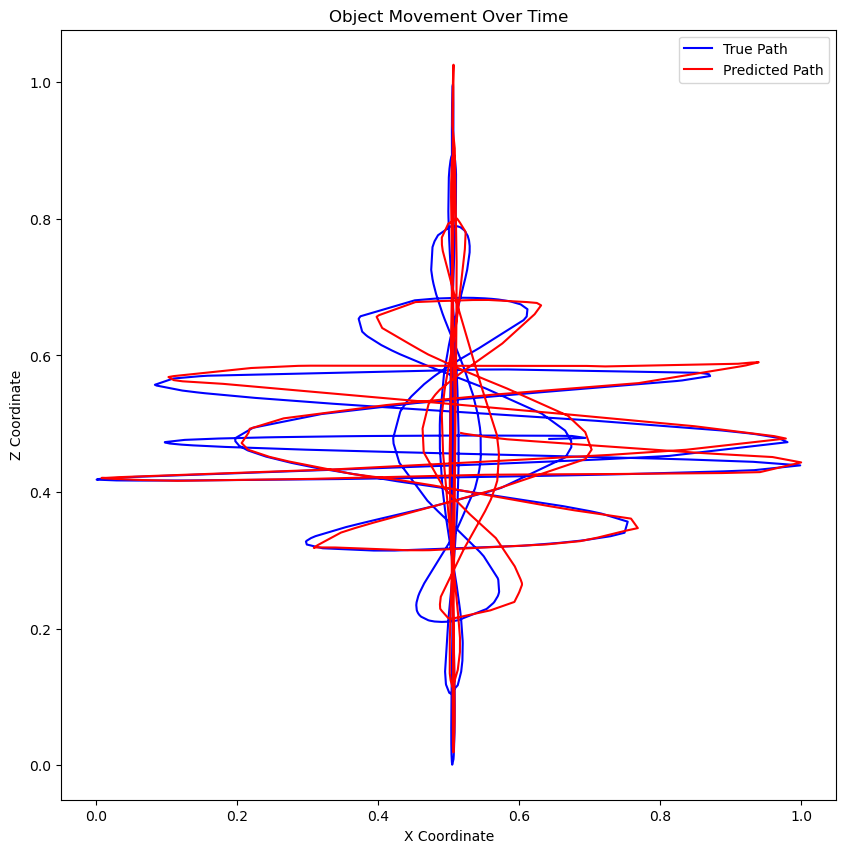

In [23]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

ax.plot(testLabels.values[:, 0], testLabels.values[:, 1], label='True Path', color='blue')

ax.plot(predictions[:, 0], predictions[:, 1], label='Predicted Path', color='red')

ax.set_xlabel('X Coordinate')
ax.set_ylabel('Z Coordinate')
ax.set_title('Object Movement Over Time')
ax.legend()

plt.show()